# TextRank + ROUGE

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import networkx as nx
from rouge import Rouge
from tqdm import tqdm_notebook
import time
import os.path
from datetime import datetime

### Build dataset

In [2]:
dtypes_br = {
    'match_id': 'int64',
    'team1': 'object',
    'team2': 'object',
    'name': 'object',
    'match_time': 'int64',
    'type': 'category',
    'minute': 'int64',
    'content': 'object',
    'message_time':'int64'
}
broadcasts = pd.read_csv('data/ods_broadcasts_201905301157.csv',
                 header=0, 
                 usecols=dtypes_br.keys(), 
                 skipinitialspace=True,
                 skip_blank_lines=True,
                 encoding='utf-8')
broadcasts.content.apply(str)
dtypes_ns = {
    'id': 'int64',
    'name': 'object',
    'ctime': 'int64',
    'body': 'object',
    'match_id': 'int64',
}
news = pd.read_csv('data/ods_match_news.csv',
                 header=0, 
                 usecols=dtypes_ns.keys(), 
                 skipinitialspace=True,
                 skip_blank_lines=True,
                 encoding='utf-8')

In [3]:
len(news.match_id.unique())

7671

In [31]:
def time_type_news(one_news, one_broadcasts):
    assert type(one_news) == pd.core.series.Series, "one_news should be Series"
    assert type(one_broadcasts) == pd.core.series.Series, "one_news should be Series"
    before = 'before'
    after = 'after'
    time_match = datetime.fromtimestamp(one_broadcasts.match_time)
    time_news  = datetime.strptime(one_news.ctime, "%Y-%m-%d %H:%M:%S")
    #print(time_match, "-", time_news, before if time_news < time_match else after)
    return before if time_news < time_match else after

In [32]:
before = []
after = []
for match_id in news.match_id.unique():
    one_broadcast = broadcasts[broadcasts['match_id']==match_id].iloc[0]
    news_scope = news[news.match_id==match_id]
    one_result = {'after':0, 'before':0}
    for i in range(len(news_scope)):
        cur_news = news_scope.iloc[i]
        ttn = time_type_news(cur_news, one_broadcast)
        one_result[ttn] += 1
    before.append(one_result['before'])
    after.append(one_result['after'])

In [36]:
assert len(before)==len(after)

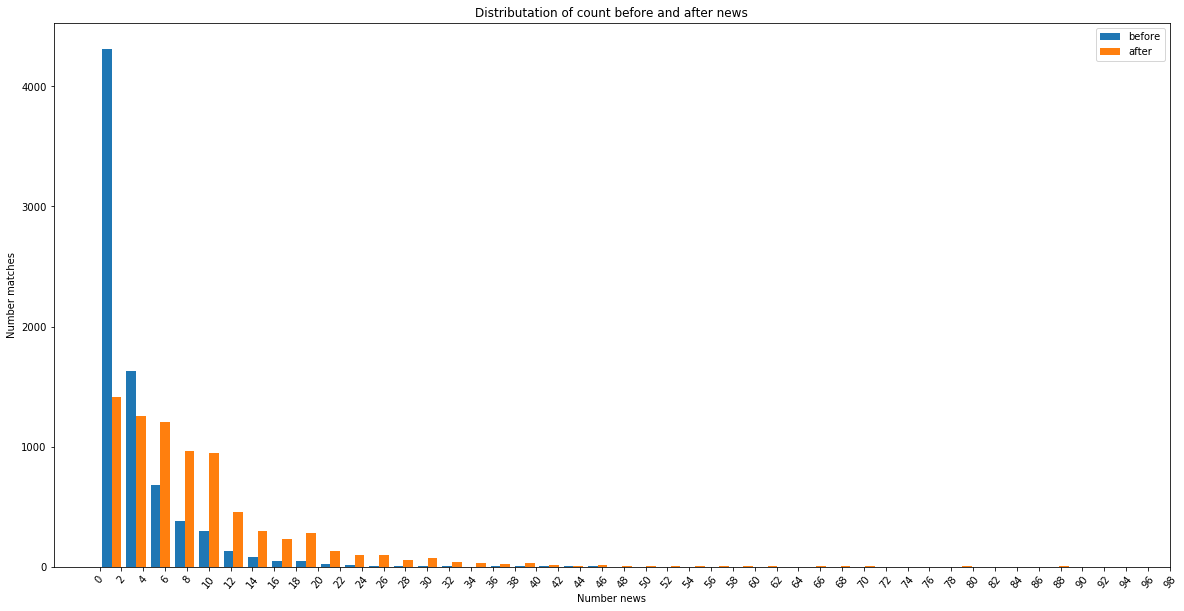

In [58]:
plt.figure(figsize=(20,10))
plt.hist([before,after],label=['before', 'after'], bins=40)
plt.legend(prop={'size': 10})
plt.title("Distributation of count before and after news")
plt.xlabel("Number news")
plt.ylabel("Number matches")
plt.xticks(range(0,100,2), rotation=50);